# Análisis DatSet Titanic 🚢 

### Exploración del DataSet 

Análisis de los Nulos
* Lo primero es hacer un análisis de los nulos
* Tendremos que hacer un recuento de los nulos en las columnas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/jimenacambronero/Desktop/Proyectos para Portfolio/titanic_raw.csv')

#DataFrame muestra.
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Formas de explorar nuestro Data

In [57]:
# Devolvera valore booleanos 
df.notnull().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_billete,rango_edad
0,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [58]:
df[df.notnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_billete,rango_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]",1


In [5]:
# Sumatorio de no nulos, las primeras no presentan nulos pero en edad por ejemplo ya aparecen valores nulos
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
# Misma consulta que la anterior realizada de distinta manera. Se crea una Serie cuyo índice esta dato por las claves del DF.Suma los valores booleanos de cada serie del Df
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Ordenamos la Serie para poder visualizar de una mejor manera los datos faltantes
total = df.isnull().sum().sort_values(ascending = False) 
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
# Construiremos una serie para saber el porcentaje de valores nulos
porcentaje = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
porcentaje

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [9]:
# Construimos un DF con las Series de totales y de porcentajes de valores nulos
datos_faltantes = pd.concat([total, porcentaje], axis = 1, keys = ['total datos', 'porcentaje de datos faltante'])
datos_faltantes

,total datos,porcentaje de datos faltante
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


La variable 'Cabin' deberia ser eliminada, ya que casi el 70% de los datos es faltante
Lo haríamos con:

        df.drop('Cabin', axis = 1, inplace = True)

Si quisieramos completar los datos faltantes de edad, una posibilidad es completarlo con un valor atípico
Lo haríamos con:

        value = 10000
        df['Age].fillna(1000, inplace = True)
        df['Age'].max()

'Embarked' solo tiene dos filas con valores nulos, a estas las podríamos eliminar.
Lo haríamos así:

        df.drop(df[pd.isnull(df['Embarked'])].index, inplace = True)

Si queremos chequear en este caso que ya no existan nulos, una posibilidad es convertir en lista y luego en conjunto, y así podremos ver cuales son los valores repetidos en caso de existir.

        set(lis(df['Embarked].isnull()))

In [10]:
# Promedios de nulos en 'Age'
df.Age.isnull().mean()

0.19865319865319866

In [11]:
# Promedio de nulos en 'Cabin'
df.Cabin.isnull().mean()

0.7710437710437711

In [12]:
# Para estadisticas descriptivas vemos los números. Muestra variables cuantitativas. Podemos observar valores atípicos como 512.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Dimensiones del DF
df.shape

(891, 12)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Pasajeros según clase

In [15]:
primera_clase = (df['Pclass'] == 1).sum()
segunda_clase = (df['Pclass'] == 2).sum()
tercera_clase = (df['Pclass'] == 3).sum()
print('Total de Pasajeros en Primera Clase:', primera_clase)
print('Total de Pasajeros en Segunda Clase:', segunda_clase)
print('Total de Pasajeros en Tercera Clase:', tercera_clase)

Total de Pasajeros en Primera Clase: 216
Total de Pasajeros en Segunda Clase: 184
Total de Pasajeros en Tercera Clase: 491


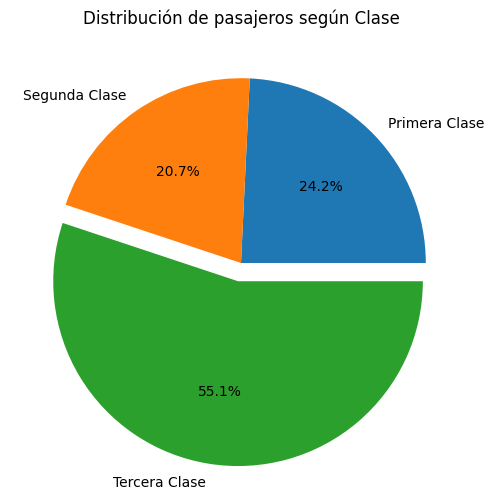

In [16]:
#Dado un conjunto de categorías o grupos con sus correspondientes valores puedes utilizar la función pie de matplotlib para crear un diagrama de sectores, también llamado gráfico circular o pie chart en inglés
plt.figure(figsize=(10,6))

labels = ['Primera Clase', 'Segunda Clase', 'Tercera Clase' ]
sizes = [primera_clase, segunda_clase, tercera_clase]

# Podemos “explotar” sectores del gráfico pasando un array del mismo tamaño que los datos a explode
explode = [0, 0, 0.1]

# También se puede mostrar la cuenta o los porcentajes para cada sector con el argumento autopct, tal y como se observa a continuación.
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode )
plt.title('Distribución de pasajeros según Clase')

plt.show()

Supervivientes según Clase

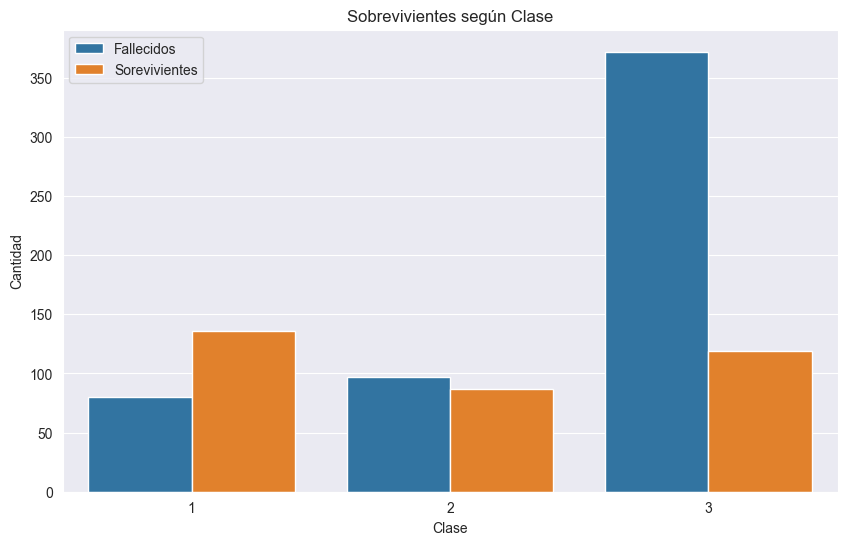

In [17]:

# La función countplot permite representar el número de observaciones para cada grupo de una variable categórica mediante barras.

# Configuramos el estilo del gráfico
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

# Creamos el gráfico de barras
sns.countplot(x ='Pclass', hue ='Survived', data=df)

# Ponemos títulos
plt.title('Sobrevivientes según Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(['Fallecidos', 'Sorevivientes'])

# Mostramos el gráfico
plt.show()


Superviviencia según Género y Clase

In [18]:
# Grafico cruzando datos, info de sexo, supervivencia y clase.
pd.crosstab ([ df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

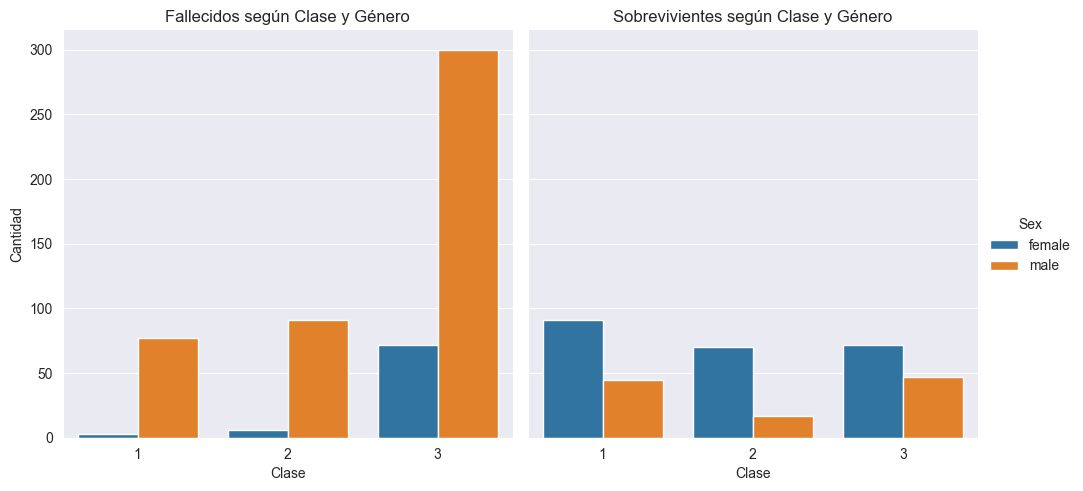

In [19]:
# Creamos dos subgráficos que desglosan la cantidad de fallecidos y sobrevivientes del Titanic según la clase y el género. Las mujeres, especialmente en primera y segunda clase, tienen una mayor tasa de supervivencia.
# Cómo se crea el gráfico: Se usa sns.catplot para crear un gráfico de barras con las variables Pclass y Sex, desglosado por la variable Survived. Configuramos las etiquetas de los ejes y los títulos de los subgráficos. Se crea el gráfico de barras usando sns.catplot. Se establecen las etiquetas de los ejes con g.set_axis_labels. Se ajustan los títulos de las columnas individualmente usando un bucle para iterar sobre los ejes (g.axes.flat). Se muestra el gráfico con plt.show().

sns.set_style("darkgrid")

# Creamos el gráfico de barras
g = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', height=5, aspect=1)

# Ponemos títulos para cada subplot
g.set_axis_labels("Clase", "Cantidad")
g.set_titles(col_template="{col_name}")

# Ajustamos los títulos de las columnas
for ax, title in zip(g.axes.flat, ["Fallecidos según Clase y Género", "Sobrevivientes según Clase y Género"]):
    ax.set_title(title)

# Mostramos el gráfico
plt.show()

Las mujeres, especialmente en primera y segunda clase, tienen una mayor tasa de supervivencia.

Analisis por sexo
- Si hacemos un recuento, podemos ver cómo se distribuyen los datos en las columnas

Análisis por edades
* ¿Cuál es la edad mínima y la máxima?
* ¿Cuál es la media de edad de las mujeres embarcadas? ¿Y la de hombres?
* Explora los datos para analizar sus recuentos en función de distintas edades

In [20]:
df.Sex == 'female'

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [21]:
# Devuelve el dataframe filtrado según género
mujeres= df[df.Sex == 'female'].count()
mujeres

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [22]:
hombres = df[df.Sex == 'male'].count()
hombres

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

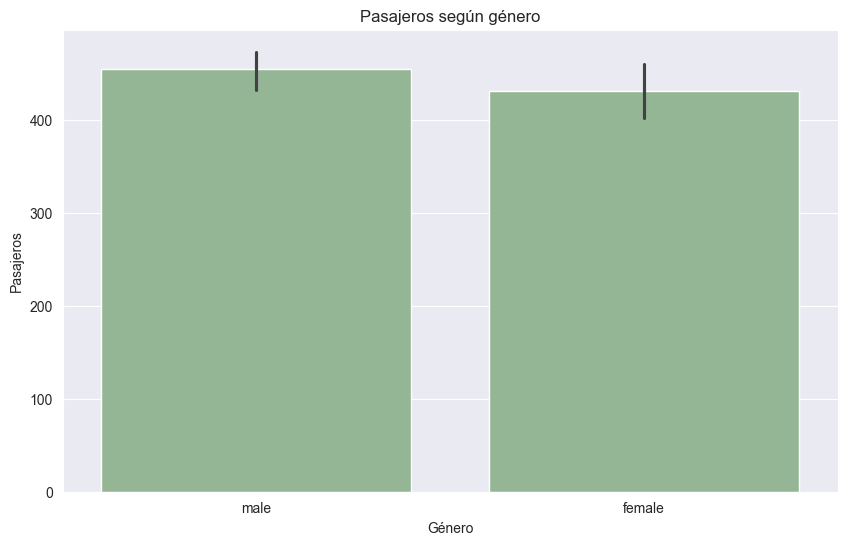

In [23]:
# Tema
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,6))

# Gráfico de barra 
sns.barplot(data = df, x = 'Sex', y = 'PassengerId',
            color = "darkseagreen",
            saturation = 0.75)

# Agregamos los titulos del gráfico
plt.title('Pasajeros según género')
plt.xlabel('Género')
plt.ylabel('Pasajeros')
plt.show()

Análisis por edad

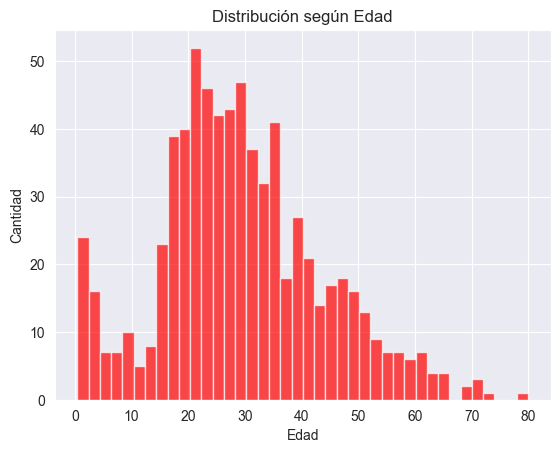

In [24]:
# Grafico de distribución de los pasajeros por edad.

#En un histograma, el eje x es una línea numérica que se ha dividido en rangos de números o bins. Para cada bin, se dibuja una barra en la que el ancho de la barra representa el rango del bin y la altura de la barra representa el número de puntos de datos incluidos en ese rango.

df.hist(column='Age', bins = 40, color = "red", alpha = 0.7)

# Agregamos los titulos del gráfico
plt.title('Distribución según Edad')
plt.xlabel ('Edad')
plt.ylabel('Cantidad')

# Mostramos el gráfico
plt.show()

In [25]:
# Edad Mínima
df.Age.min()

0.42

In [26]:
# Edad Máxima
df.Age.max()

80.0

In [27]:
# Edad filtrada por sexo
df.Age[df.Sex == 'female']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64

In [28]:
# Promedio de edad filtrada por sexo
df.Age[df.Sex == 'female'].mean()

27.915708812260537

In [29]:
# Promedio de edad filtrada por sexo Masculino
df.Age[df.Sex == 'male'].mean()

30.72664459161148

In [30]:
# Conteo mayores de edad sin distinción de sexo
df[(df.Age > 18)].count()

PassengerId    575
Survived       575
Pclass         575
Name           575
Sex            575
Age            575
SibSp          575
Parch          575
Ticket         575
Fare           575
Cabin          162
Embarked       573
dtype: int64

In [31]:
# Conteo menores de edad sin distinción de sexo
df[(df.Age < 18)].count()

PassengerId    113
Survived       113
Pclass         113
Name           113
Sex            113
Age            113
SibSp          113
Parch          113
Ticket         113
Fare           113
Cabin           19
Embarked       113
dtype: int64

Sobrevivientes

* ¿En qué proporción sobrevivieron los pasajeros?

In [32]:
# Proporción de pasajeros sobrevivientes. De la siguiente manera obtendremos un conteo de filas. No de verdaderos sobrevivientes
df.Survived.count()

891

In [33]:
# Sumamos los sobrevivientes.
df.Survived.sum()

342

¿Qué caracteristicas tenían los que sobrevivieron?

In [34]:
# Filtramos 0 = NO, 1= SI
df.Survived[df.Survived == 0].count()

549

In [35]:
df.Survived[df.Survived == 1].count()

342

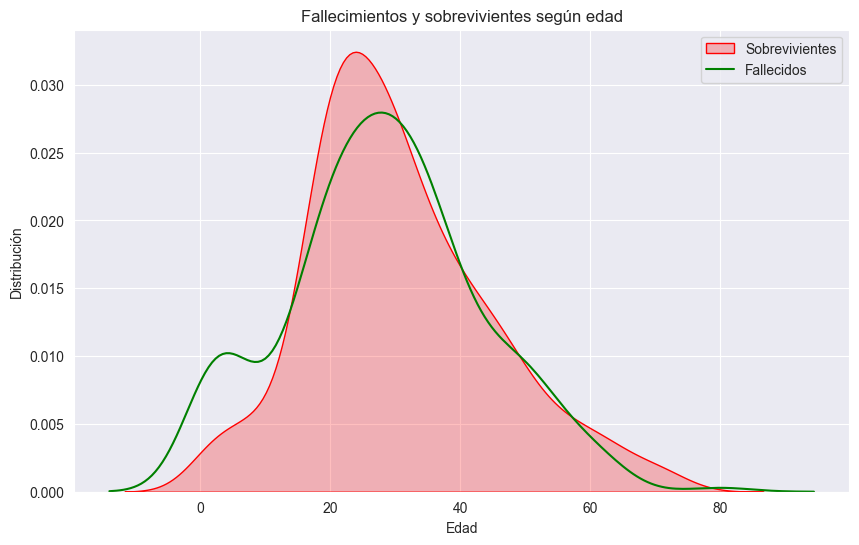

In [36]:
# Gráfico de distribución de fallecimientos y sobrevivientes según edad.
plt.figure(figsize=(10,6))

axs = sns.kdeplot(df.Age[df.Survived == 0], fill = True, color = 'red', label = 'Fallecido')
axs = sns.kdeplot(df.Age[df.Survived == 1], color = 'Green', label = 'Sobreviviente')

# Titulos del gráfico
plt.title('Fallecimientos y sobrevivientes según edad')
plt.xlabel('Edad')
plt.ylabel('Distribución')
plt.legend({'Fallecidos', 'Sobrevivientes'})

# Mostramos el gráfico
plt.show()

In [37]:
# Casi el 40 % sobrevivió
round(df.Survived[df.Survived == 1].count() / df.Survived.count() * 100,2)

38.38

## Análisis según costo del Billete (característica continua)

In [38]:
# Valor máximo sy mínimos de billetes
print('El billete más caro:', df['Fare'].max())
print('El billete más económico:', df['Fare'].min())

El billete más caro: 512.3292
El billete más económico: 0.0


#### Agruparemos en rangos los Billetes para poder analizarlos con variables categóricas

In [39]:
df['rango_billete'] = pd.qcut(df['Fare'], 4)
df.groupby(['rango_billete']) ['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

/var/folders/2d/p3zg32ds4p598pyxblpsp5ph0000gn/T/ipykernel_2086/4201534782.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['rango_billete']) ['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
rango_billete,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
sobrevivientes_boletos_caros = ((df['Fare']> 500) & (df['Survived']== 1)).sum()
print('Cantidad de supervivientes que abonaron su billete más de 500usd:', sobrevivientes_boletos_caros)

Cantidad de supervivientes que abonaron su billete más de 500usd: 3


In [41]:
# chequeamos la cantidad de pasajeros que costeron estos boletos
df.loc[df['Fare'] > 500 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_billete
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"(31.0, 512.329]"
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"(31.0, 512.329]"
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"(31.0, 512.329]"


Los TRES pasajeron que abonaron los únicos tres boletos superiores a 500dls sobrevivieron

## Análisis según Género de los supervivientes.

In [42]:
# Caracteristicas de los supervivientes
df[(df.Sex == 'female') & (df.Survived == 1)].count()

PassengerId      233
Survived         233
Pclass           233
Name             233
Sex              233
Age              197
SibSp            233
Parch            233
Ticket           233
Fare             233
Cabin             91
Embarked         231
rango_billete    233
dtype: int64

In [43]:
df[(df.Sex == 'male') & (df.Survived == 1)].count()

PassengerId      109
Survived         109
Pclass           109
Name             109
Sex              109
Age               93
SibSp            109
Parch            109
Ticket           109
Fare             109
Cabin             45
Embarked         109
rango_billete    109
dtype: int64

### En términos **absolutos** sobrevivieron más **Mujeres**

In [44]:
df[(df.Sex == 'female')].count()

PassengerId      314
Survived         314
Pclass           314
Name             314
Sex              314
Age              261
SibSp            314
Parch            314
Ticket           314
Fare             314
Cabin             97
Embarked         312
rango_billete    314
dtype: int64

In [45]:
# Guardamos en una variable el total de pasajeros mujeres.
total_mujeres = df.Survived[(df.Sex == 'female')].count()
print ('Total de pasajeros mujeres:', total_mujeres)

# Guardamos el total de mujeres sobrevivientes.
sobrevivientes_mujeres = df.Survived [(df.Sex == 'female') & (df.Survived == 1)].count()
print('Total de mujeres sobrevivientes:', sobrevivientes_mujeres)

muertes_mujeres = df.Survived [(df.Sex == 'female') & (df.Survived == 0)].count()
print('Total de mujeres muertas:', muertes_mujeres)

# Porcentaje de mujeres sobrevivientes
total_mujeres_sobrevivientes = round(sobrevivientes_mujeres / total_mujeres * 100)
print('El total de mujeres sobrevivientes es del', total_mujeres_sobrevivientes,'%')

Total de pasajeros mujeres: 314
Total de mujeres sobrevivientes: 233
Total de mujeres muertas: 81
El total de mujeres sobrevivientes es del 74 %


In [46]:
# Guardamos en una variable el total de pasajeros mujeres.
total_hombres = df.Survived[(df.Sex == 'male')].count()
print ('Total de pasajeros hombres:', total_hombres)

# Guardamos el total de mujeres sobrevivientes.
sobrevivientes_hombres = df.Survived [(df.Sex == 'male') & (df.Survived == 1)].count()
print('Total de hombres sobrevivientes:', sobrevivientes_hombres)

muertes_hombres = df.Survived [(df.Sex == 'male') & (df.Survived == 0)].count()
print('Total de hombres muertos:', muertes_hombres)

total_hombres_sobrevivientes = round(df.Survived [(df.Sex == 'male') & (df.Survived == 1)].count() 
                                     / df.Survived [(df.Sex == 'male')].count() *100)

print ( 'El total de hombres sobrevivientes es de', total_hombres_sobrevivientes,'%')

Total de pasajeros hombres: 577
Total de hombres sobrevivientes: 109
Total de hombres muertos: 468
El total de hombres sobrevivientes es de 19 %


 En términos **relativos** las mujeres sobrevivieron en un 74% y los hombres en un 19%. Las mujeres fueron las primeras en llegar a los botes salvavidas

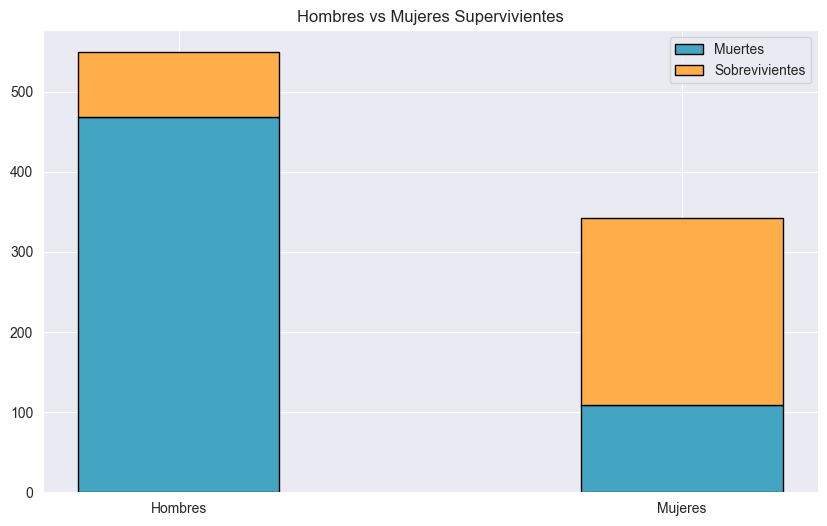

In [47]:
# Grafico de barras representativo de muertes y fallecimientos según género
# Los gráficos de barras apiladas representan los valores que toman ciertos grupos dentro de otros grupos.

#agrandamos la figura
plt.figure(figsize=(10,6))
h_data = (muertes_hombres, sobrevivientes_hombres)
m_data = (muertes_mujeres, sobrevivientes_mujeres)

#Creamos las barras
p1 = plt.bar(np.arange(2), (h_data), width = 0.4, color = "#44a5c2", edgecolor = "black", linewidth = 1)
p2 = plt.bar(np.arange(2), (m_data), bottom = h_data, width = 0.4, color = "#ffae49", edgecolor = "black", linewidth = 1)

# Agregamos Leyendas y Titulos al gráfico
plt.xticks(np.arange(2),['Hombres', 'Mujeres'])
plt.legend((p1[0],p2[0]), ('Muertes', 'Sobrevivientes'))
plt.title('Hombres vs Mujeres Supervivientes')
plt.show()

# Análisis por Edad 
(Se agrupan las edad por rangos)

* 0 = Niños
* 1 = Jóvenes
* 2 = Adultos
* 3 = Adultos Mayores
* 4 = Mayores

In [48]:
# Normalización. Nueva columna con rango edad
df ['rango_edad'] = 0
df.loc[ df['Age'] <= 16, 'rango_edad' ] = 0
df.loc[ (df['Age'] > 16) & (df['Age'] <= 32), 'rango_edad' ] = 1
df.loc[ (df['Age'] > 32) & (df['Age'] <= 48), 'rango_edad' ] = 2
df.loc[ (df['Age'] > 48) & (df['Age'] <= 64), 'rango_edad' ] = 3
df.loc[ df['Age'] > 64 ,'rango_edad' ] = 4

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_billete,rango_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]",2


In [49]:
# Cantidad de pasajeros según rango.
df['rango_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
rango_edad,
1,346
0,277
2,188
3,69
4,11


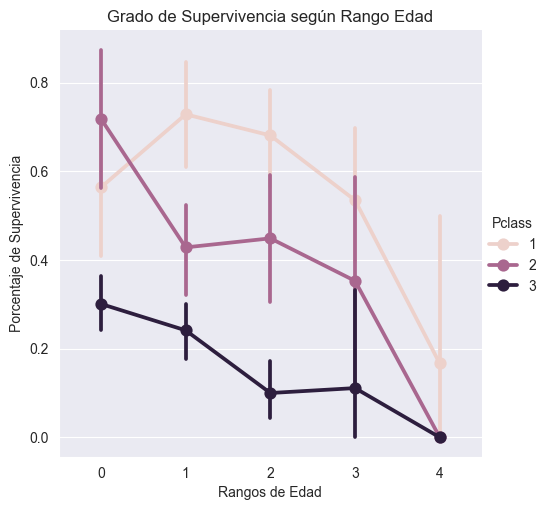

In [50]:
sns.catplot(x ='rango_edad', y ='Survived', data = df, hue= 'Pclass', kind='point')

# Agregamos los títulos
plt.title('Grado de Supervivencia según Rango Edad')
plt.xlabel('Rangos de Edad')
plt.ylabel('Porcentaje de Supervivencia')

plt.show()

Observamos que en las Tres Clases se priorizaron los menores, incluso en la Tercera clase donde el porcentaje de supervivencia es mucho menor.

La tasa de supervivencia disminuye a medida que aumenta la edad, independientemente de la clase en que viajara el pasajero.

In [51]:
# Tasa de supervivencia de los niños. Niños menores de 6 años
total_ninios = df.Age[(df.Age < 6)].count()
total_ninios

44

In [52]:
# Niños menores de 6 años sobreviviente
total_sobrevivientes_ninios = df.Age[(df.Age < 6 ) & (df.Survived == 1)].count()
total_sobrevivientes_ninios

31

In [53]:
df[(df.Age < 6) & (df.Survived == 0)].count()

PassengerId      13
Survived         13
Pclass           13
Name             13
Sex              13
Age              13
SibSp            13
Parch            13
Ticket           13
Fare             13
Cabin             2
Embarked         13
rango_billete    13
rango_edad       13
dtype: int64

In [54]:
sobrevivientes_ninios = round(total_sobrevivientes_ninios / total_ninios * 100, 2)
sobrevivientes_ninios

70.45

En términos **relativos** del total de niños menores de 6 años sobrevivió el 70%. 

## Análisis según zona de embarque

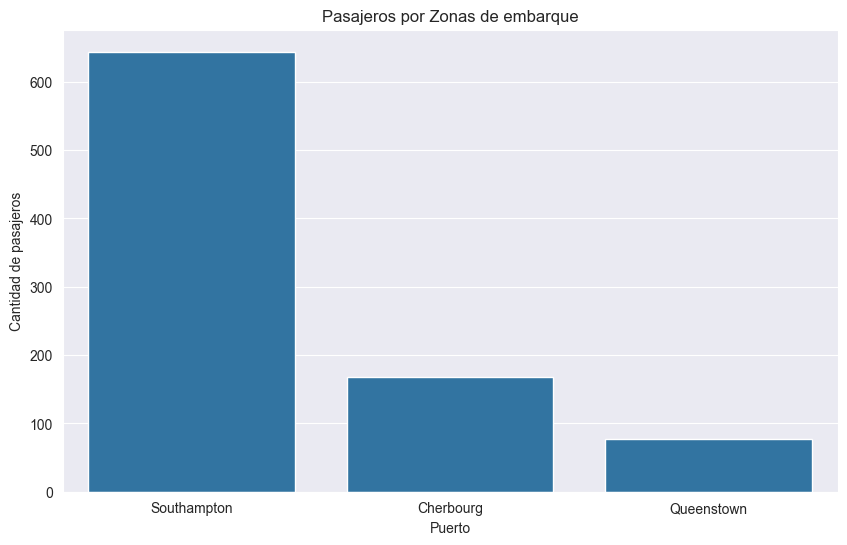

In [55]:
# Usaremos solamente la columna de Embarked
plt.figure(figsize=(10,6))
sns.countplot(x = df['Embarked'])

# Colocamos Títulos y Leyendas
plt.title('Pasajeros por Zonas de embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')

plt.xticks(np.arange(3),['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

Sobrevivientes según zona de embarque

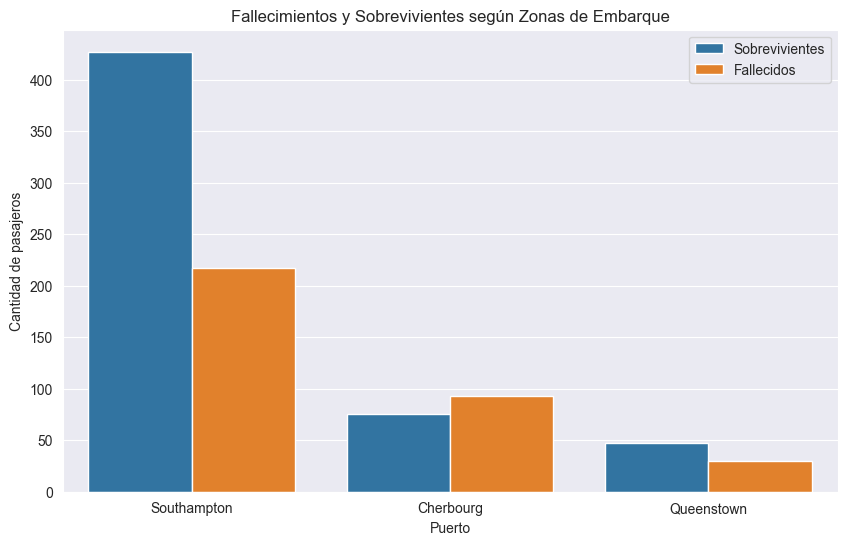

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Embarked'], hue = df ['Survived'])

# Colocamos Títulos y Leyendas
plt.title('Fallecimientos y Sobrevivientes según Zonas de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')

plt.xticks(np.arange(3),['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend ({'Fallecidos', 'Sobrevivientes'})
plt.show()